# Getting DATA from yahoo finance

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize']=[16,9]
plt.rcParams['figure.dpi']= 300
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import pandas as pd
import yfinance as yf

In [3]:
# ejemplo de descarga de varias acciones
df_yahoo0 = yf.download(['AAPL','AMZN'], # nombre de los activos
                      start='2000-01-01', # fecha de inicio para la descarga
                      end='2010-12-31', #fehca final para la descarga
                      progress=False, #muestra una barra con el progreso de la acción de descarga
                       actions='inline', # muestra los dividendos y y las divisiones de acciones
                       auto_adjust=True) # para mostrar solo los precios al cierre ajustados
df_yahoo0

Close             Dividends            High              \
                 AAPL        AMZN      AAPL AMZN       AAPL        AMZN   
Date                                                                      
2000-01-03   3.460857   89.375000         0    0   3.478249   89.562500   
2000-01-04   3.169071   81.937500         0    0   3.420278   91.500000   
2000-01-05   3.215448   69.750000         0    0   3.418346   75.125000   
2000-01-06   2.937188   65.562500         0    0   3.308201   72.687500   
2000-01-07   3.076317   69.562500         0    0   3.122694   70.500000   
...               ...         ...       ...  ...        ...         ...   
2010-12-23  40.019943  182.589996         0    0  40.211633  184.979996   
2010-12-27  40.153526  182.139999         0    0  40.247515  183.139999   
2010-12-28  40.251225  181.089996         0    0  40.398392  182.770004   
2010-12-29  40.228962  183.369995         0    0  40.372420  184.350006   
2010-12-30  40.027370  182.750000         0    0  40.256159  184.550003   

                  Low                   Open             Stock Splits       \
                 AAPL        AMZN       AAPL        AMZN         AAPL AMZN   
Date                                                                         
2000-01-03   3.143950   79.046875   3.242501   81.500000          0.0    0   
2000-01-04   3.128492   81.750000   3.346848   85.375000          0.0    0   
2000-01-05   3.184530   68.000000   3.207719   70.500000          0.0    0   
2000-01-06   2.937188   64.000000   3.281148   71.312500          0.0    0   
2000-01-07   2.952646   66.187500   2.983564   67.000000          0.0    0   
...               ...         ...        ...         ...          ...  ...   
2010-12-23  39.966762  181.889999  40.193080  184.339996          0.0    0   
2010-12-27  39.762723  180.449997  39.927208  181.899994          0.0    0   
2010-12-28  40.200517  181.050003  40.305638  182.100006          0.0    0   
2010-12-29  40.205462  180.410004  40.343974  181.800003          0.0    0   
2010-12-30  39.951931  182.750000  40.252450  183.919998          0.0    0   

               Volume            
                 AAPL      AMZN  
Date                             
2000-01-03  133949200  16117600  
2000-01-04  128094400  17487400  
2000-01-05  194580400  38457400  
2000-01-06  191993200  18752000  
2000-01-07  115183600  10505400  
...               ...       ...  
2010-12-23   55789300   3358200  
2010-12-27   62454000   2249400  
2010-12-28   43981000   1975000  
2010-12-29   40784800   3120100  
2010-12-30   39373600   1961200  

[2766 rows x 14 columns]

In [56]:
df_yahoo = yf.download('AAPL',
                      start='1999-12-01',
                      end='2010-12-31',
                      progress=True)

[*********************100%***********************]  1 of 1 completed


In [57]:
df_yahoo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-01,3.607143,3.732143,3.573661,3.680804,3.186461,154641200
1999-12-02,3.683036,3.950893,3.633929,3.935268,3.406750,141839600
1999-12-03,4.006696,4.127232,3.995536,4.107143,3.555543,161980000
1999-12-06,4.091518,4.189732,3.979911,4.142857,3.586461,116695600
1999-12-07,4.162946,4.214286,4.071429,4.207589,3.642499,111255200
...,...,...,...,...,...,...
2010-12-23,46.428570,46.450001,46.167141,46.228573,40.019943,55789300
2010-12-27,46.121429,46.491428,45.931427,46.382858,40.153526,62454000
2010-12-28,46.558571,46.665714,46.437141,46.495716,40.251225,43981000


# Hallando los retornos de una acción

In [24]:
import numpy as np

In [36]:
df = df_yahoo.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
1999-12-01,3.186461
1999-12-02,3.406750
1999-12-03,3.555543
1999-12-06,3.586461
1999-12-07,3.642499
...,...
2010-12-23,40.019943
2010-12-27,40.153526
2010-12-28,40.251225


In [37]:
df['simple_return'] = df.adj_close.pct_change()
df['log_return'] = np.log(df.adj_close/df.adj_close.shift(1))

In [38]:
df

,adj_close,simple_return,log_return
Date,,,
1999-12-01,3.186461,NaN,NaN
1999-12-02,3.406750,0.069133,0.066848
1999-12-03,3.555543,0.043676,0.042749
1999-12-06,3.586461,0.008696,0.008658
1999-12-07,3.642499,0.015625,0.015504
...,...,...,...
2010-12-23,40.019943,-0.004798,-0.004809
2010-12-27,40.153526,0.003338,0.003332
2010-12-28,40.251225,0.002433,0.002430


# Incluyendo la inflación en nuestro análisis

In [39]:
# primero descargamos la inflación mensual de Quandl
# api key = Tph-Xo5hkWy4NqTTRv7s
import quandl
QUANDL_KEY = '2Y3Ayy5N7QyELtc7axtz'
quandl.ApiConfig.api_key = QUANDL_KEY

In [40]:
df_all_dates= pd.DataFrame( index=pd.date_range(start='1999-12-31',
                                               end='2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left').fillna(method='ffill').asfreq('M')

In [41]:
df_cpi = quandl.get(dataset='RATEINF/CPI_USA',
                   start_date='1999-12-01',
                   end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

In [42]:
df_merged = df.join(df_cpi, how='left')

df_merged

,adj_close,cpi
1999-12-31,3.178732,168.300
2000-01-31,3.207718,168.800
2000-02-29,3.543948,169.800
2000-03-31,4.199018,171.200
2000-04-30,3.835737,171.300
...,...,...
2010-08-31,30.064436,218.312
2010-09-30,35.091660,218.439
2010-10-31,37.222515,218.711
2010-11-30,38.480263,218.803


In [43]:
df_merged['simple_return']=df_merged.adj_close.pct_change()
df_merged['inflation_rate']=df_merged.cpi.pct_change()

In [44]:
df_merged['real_return']=(df_merged.simple_return+1)/(df_merged.inflation_rate + 1) - 1
df_merged

,adj_close,cpi,simple_return,inflation_rate,real_return
1999-12-31,3.178732,168.300,NaN,NaN,NaN
2000-01-31,3.207718,168.800,0.009119,0.002971,0.006130
2000-02-29,3.543948,169.800,0.104819,0.005924,0.098313
2000-03-31,4.199018,171.200,0.184842,0.008245,0.175153
2000-04-30,3.835737,171.300,-0.086516,0.000584,-0.087049
...,...,...,...,...,...
2010-08-31,30.064436,218.312,-0.055005,0.001381,-0.056308
2010-09-30,35.091660,218.439,0.167215,0.000582,0.166536
2010-10-31,37.222515,218.711,0.060723,0.001245,0.059403
2010-11-30,38.480263,218.803,0.033790,0.000421,0.033355


# Realized Volatility

In [45]:
df['log_return'] = np.log(df.adj_close/df.adj_close.shift(1))
df

,adj_close,log_return
1999-12-31,3.178732,NaN
2000-01-31,3.207718,0.009077
2000-02-29,3.543948,0.099682
2000-03-31,4.199018,0.169609
2000-04-30,3.835737,-0.090489
...,...,...
2010-08-31,30.064436,-0.056576
2010-09-30,35.091660,0.154621
2010-10-31,37.222515,0.058950
2010-11-30,38.480263,0.033232


In [21]:
# Function for calculating the Realized Volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [46]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_return':'rv'},inplace=True)

In [55]:
df_rv.rv  = df_rv.rv * np.sqrt(12)
df_rv

,adj_close,rv
1999-12-31,3.178732,0.000000
2000-01-31,3.207718,0.108928
2000-02-29,3.543948,1.196180
2000-03-31,4.199018,2.035311
2000-04-30,3.835737,1.085871
...,...,...
2010-08-31,30.064436,0.678906
2010-09-30,35.091660,1.855446
2010-10-31,37.222515,0.707404
2010-11-30,38.480263,0.398780


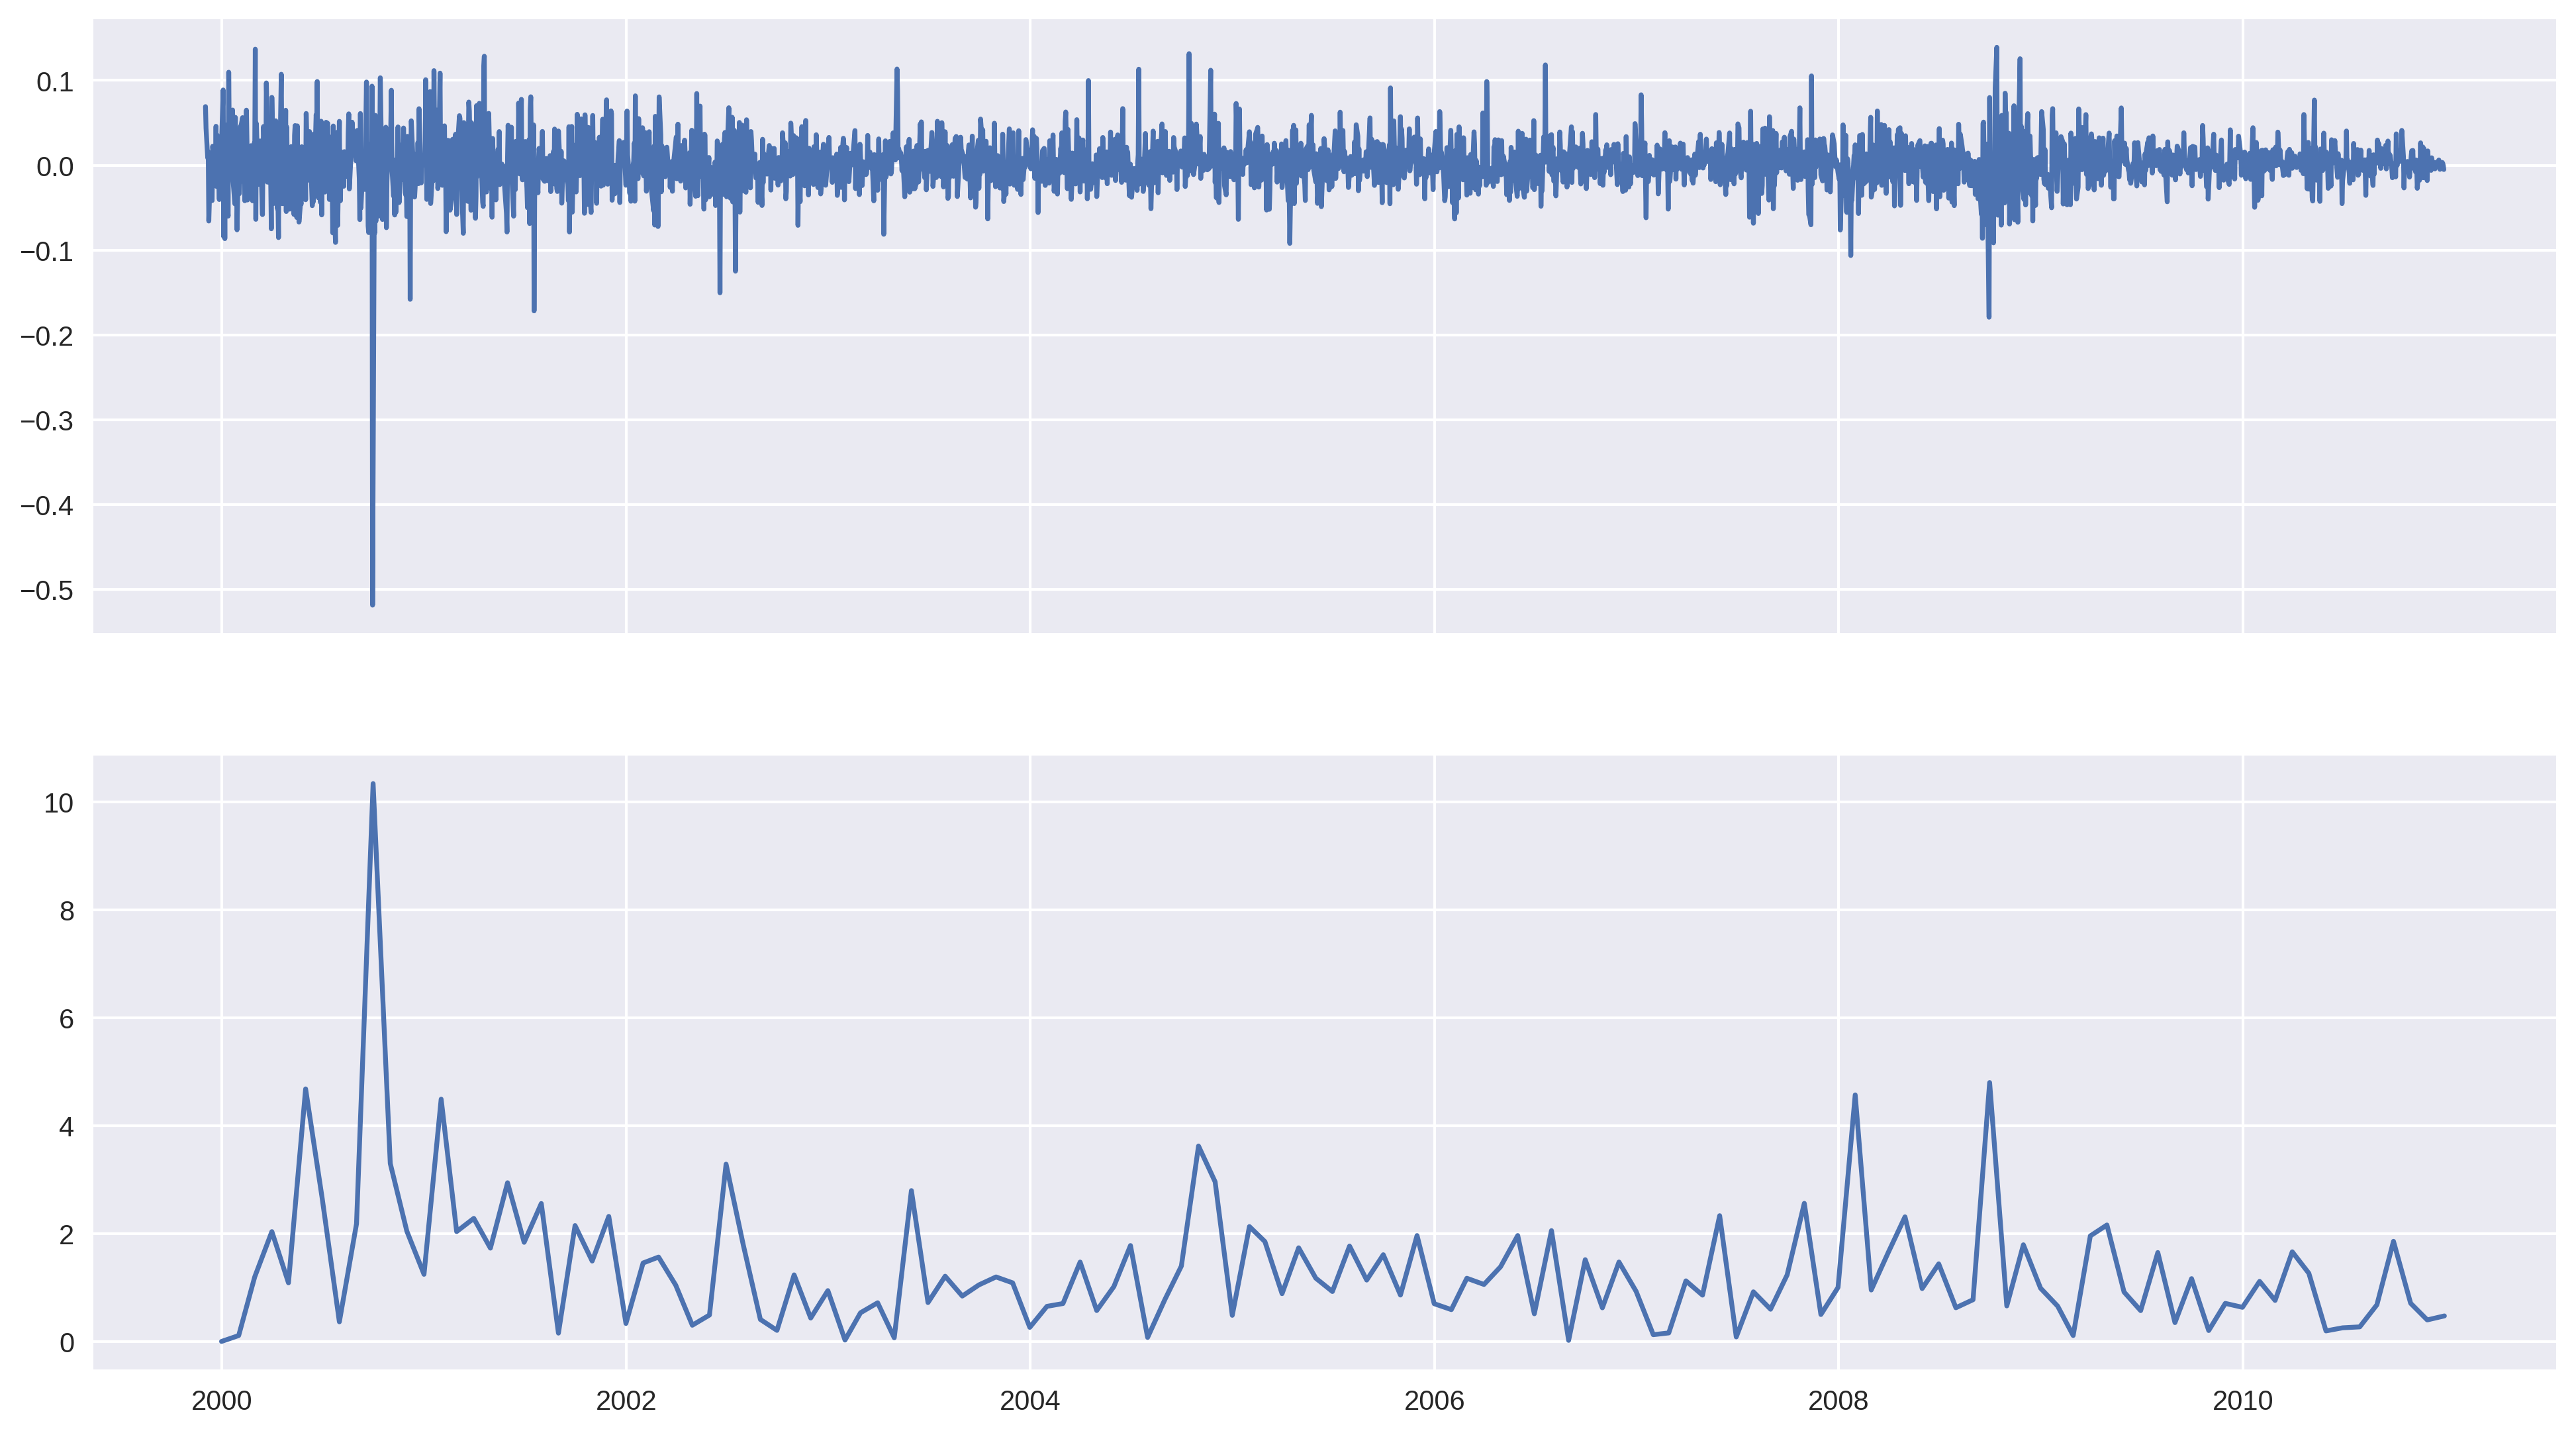

In [60]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df_yahoo['Adj Close'].pct_change())
ax[1].plot(df_rv.rv);

# Visualizing time series data